In [22]:
#Import Dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#Read CSV File, Converting to DF
person_df = pd.read_csv('./person.CSV')

In [23]:
#Clean The Data To Only Include The Driver of A Motor Vehicle
person_df = person_df[person_df['PER_TYP'] == 1]
person_df

,CASENUM,VE_FORMS,VEH_NO,PER_NO,STRATUM,STRATUMNAME,REGION,REGIONNAME,PSU,PJ,...,INJSEV_IM,INJSEV_IMNAME,EJECT_IM,EJECT_IMNAME,PERALCH_IM,PERALCH_IMNAME,SEAT_IM,SEAT_IMNAME,AGE_IM,AGE_IMNAME
0,201901174219,1,1,1,10,Stratum 10 - Other,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",75,4144,...,0,No Apparent Injury (O),0,Not Ejected,0,No (Alcohol Not Involved),11,"Front Seat, Left Side",39,39 Years
1,201901176655,2,1,1,6,Stratum 6 - LMY PV Minor Injury,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",63,4135,...,0,No Apparent Injury (O),0,Not Ejected,0,No (Alcohol Not Involved),11,"Front Seat, Left Side",20,20 Years
5,201901176655,2,2,1,6,Stratum 6 - LMY PV Minor Injury,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",63,4135,...,0,No Apparent Injury (O),0,Not Ejected,0,No (Alcohol Not Involved),11,"Front Seat, Left Side",42,42 Years
7,201901176667,2,1,1,8,Stratum 8 - NLMY PV Minor Injury,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",65,4138,...,2,Suspected Minor Injury (B),0,Not Ejected,1,Yes (Alcohol Involved),11,"Front Seat, Left Side",37,37 Years
8,201901176667,2,2,1,8,Stratum 8 - NLMY PV Minor Injury,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",65,4138,...,1,Possible Injury (C),0,Not Ejected,0,No (Alcohol Not Involved),11,"Front Seat, Left Side",50,50 Years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135403,201902285945,1,1,1,10,Stratum 10 - Other,2,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",67,1921,...,0,No Apparent Injury (O),0,Not Ejected,0,No (Alcohol Not Involved),11,"Front Seat, Left Side",59,59 Years
135404,201902285953,2,1,1,9,Stratum 9 - LMY PV No Injuries in Crash,2,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",67,1921,...,0,No Apparent Injury (O),0,Not Ejected,0,No (Alcohol Not Involved),11,"Front Seat, Left Side",22,22 Years
135405,201902285953,2,2,1,9,Stratum 9 - LMY PV No Injuries in Crash,2,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",67,1921,...,0,No Apparent Injury (O),0,Not Ejected,0,No (Alcohol Not Involved),11,"Front Seat, Left Side",69,69 Years
135407,201902285965,2,1,1,6,Stratum 6 - LMY PV Minor Injury,2,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",67,1921,...,2,Suspected Minor Injury (B),0,Not Ejected,0,No (Alcohol Not Involved),11,"Front Seat, Left Side",56,56 Years


# Bar Chart - Injury Severity Associations

In [24]:
##Age and Sex

#Copy Neccessary Columns to New DF
personCl = person_df[['AGE_IM', 'SEX_IMNAME', 'INJSEV_IM']].copy()
personCl


,AGE_IM,SEX_IMNAME,INJSEV_IM
0,39,Male,0
1,20,Male,0
5,42,Female,0
7,37,Male,2
8,50,Male,1
...,...,...,...
135403,59,Female,0
135404,22,Male,0
135405,69,Female,0
135407,56,Female,2


In [25]:
##Create Group and Calculate Totals for Each Group

#Array to Hold Age Group Labels
xlabels = ['<18', '19-29', '30-39', '40-49', '50+']

#Separate Arrays to Store Male and Female Data Based on Age Group
gr1M = []
gr1F = []
gr2M = []
gr2F = []
gr3M = []
gr3F = []
gr4M = []
gr4F = []
gr5M = []
gr5F = []

#Loop Through the 7 Possible INJSEV_IM Code Numbers
for x in range(7):
    
    #Count Amount of Times Each INJSEV_IM Code Appears In CSV Based on Age and Sex
    ageGr1M = len(personCl.loc[(personCl['AGE_IM'] <= 18) & (personCl['SEX_IMNAME'] == 'Male') & (personCl['INJSEV_IM'] == x)])
    ageGr1F = len(personCl.loc[(personCl['AGE_IM'] <= 18) & (personCl['SEX_IMNAME'] == 'Female') & (personCl['INJSEV_IM'] == x)])
    ageGr2M = len(personCl.loc[(personCl['AGE_IM'] < 30) &(personCl['AGE_IM'] >= 19) & (personCl['SEX_IMNAME'] == 'Male') & (personCl['INJSEV_IM'] == x)])
    ageGr2F = len(personCl.loc[(personCl['AGE_IM'] < 30) &(personCl['AGE_IM'] >= 19) & (personCl['SEX_IMNAME'] == 'Female') & (personCl['INJSEV_IM'] == x)])
    ageGr3M = len(personCl.loc[(personCl['AGE_IM'] < 40) &(personCl['AGE_IM'] >= 30) & (personCl['SEX_IMNAME'] == 'Male') & (personCl['INJSEV_IM'] == x)])
    ageGr3F = len(personCl.loc[(personCl['AGE_IM'] < 40) &(personCl['AGE_IM'] >= 30) & (personCl['SEX_IMNAME'] == 'Female') & (personCl['INJSEV_IM'] == x)])
    ageGr4M = len(personCl.loc[(personCl['AGE_IM'] < 50) &(personCl['AGE_IM'] >= 40) & (personCl['SEX_IMNAME'] == 'Male') & (personCl['INJSEV_IM'] == x)])
    ageGr4F = len(personCl.loc[(personCl['AGE_IM'] < 50) &(personCl['AGE_IM'] >= 40) & (personCl['SEX_IMNAME'] == 'Female') & (personCl['INJSEV_IM'] == x)])
    ageGr5M = len(personCl.loc[(personCl['AGE_IM'] >= 50) & (personCl['SEX_IMNAME'] == 'Male') & (personCl['INJSEV_IM'] == x)])
    ageGr5F = len(personCl.loc[(personCl['AGE_IM'] >= 50) & (personCl['SEX_IMNAME'] == 'Female') & (personCl['INJSEV_IM'] == x)])
    
    #Add Each Value to Corresponding Age Group Array
    gr1M.append(ageGr1M)
    gr1F.append(ageGr1F)
    gr2M.append(ageGr2M)
    gr2F.append(ageGr2F)
    gr3M.append(ageGr3M)
    gr3F.append(ageGr3F)
    gr4M.append(ageGr4M)
    gr4F.append(ageGr4F)
    gr5M.append(ageGr5M)
    gr5F.append(ageGr5F)
    
#Construct Male DF Using Data From Corresponding Array
maleDf = pd.DataFrame({'<18': gr1M,
                          '19-29': gr2M,
                          '30-39': gr3M,
                          '40-49': gr4M,
                          '50+': gr5M})

#Construct Male DF Using Data From Corresponding Array
femaleDf = pd.DataFrame({'<18': gr1F,
                          '19-29': gr2F,
                          '30-39': gr3F,
                          '40-49': gr4F,
                          '50+': gr5F})
print(maleDf)
print(femaleDf)

    <18  19-29  30-39  40-49    50+
0  2252  10976   8317   6761  13413
1   294   1716   1314   1074   2121
2   230   1209    797    642   1336
3   134    746    531    429    831
4    10    115     88     75    203
5    11     29     18     19     58
6     0      0      0      0      4
    <18  19-29  30-39  40-49   50+
0  1967   8181   6001   4437  8419
1   317   1826   1394   1157  2033
2   175    910    604    463   952
3    68    441    299    276   557
4     8     34     25     21    73
5     7     21     18     14    36
6     0      0      0      0     1


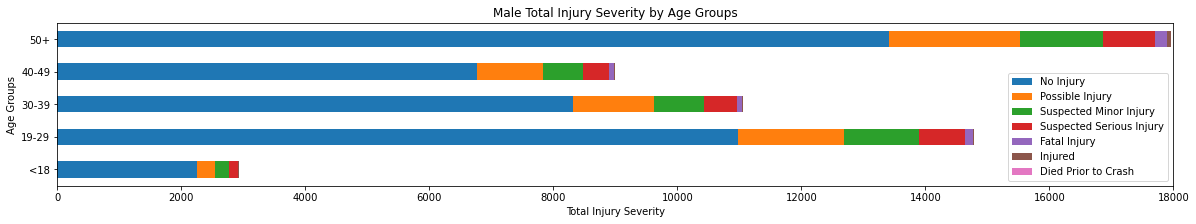

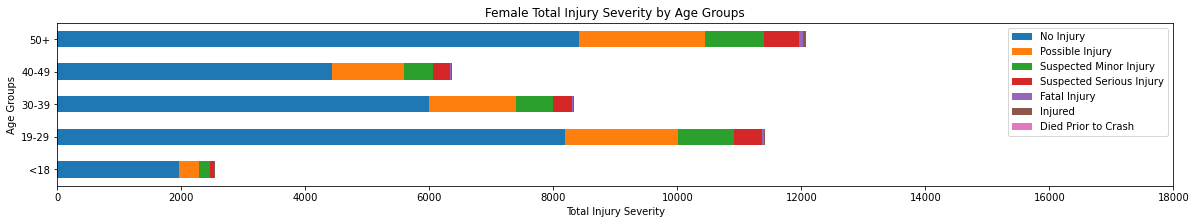

In [26]:
## Establish Graph Elements

#Set The Figure Size For Both Figures
plt.rcParams["figure.figsize"] = (20,3)

#Transpose and Convert DF to Horizontal Stacked Bar Graph with Title
malePlot = maleDf.T.plot.barh(stacked = True, title = 'Male Total Injury Severity by Age Groups')

#Set Figure Limits to Match Female
plt.xlim([0, 18000])

#Set Axis Labels
plt.xlabel('Total Injury Severity')
plt.ylabel('Age Groups')

#Configure Legend for Male
malePlot.legend(['No Injury', 'Possible Injury', 'Suspected Minor Injury', 'Suspected Serious Injury', 'Fatal Injury', 'Injured', 'Died Prior to Crash'])

#Transpose and Convert DF to Horizontal Stacked Bar Graph with Title
femalePlot = femaleDf.T.plot.barh(stacked = True, title = 'Female Total Injury Severity by Age Groups')

#Set Figure Limits to Match Male
plt.xlim([0, 18000])

#Set Axis Labels
plt.xlabel('Total Injury Severity')
plt.ylabel('Age Groups')

#Configure Legend for Female
femalePlot.legend(['No Injury', 'Possible Injury', 'Suspected Minor Injury', 'Suspected Serious Injury', 'Fatal Injury', 'Injured', 'Died Prior to Crash'])